# Linear Regression for temperature around a room

Here we apply linear regression to find which area of the room is more hot. Inputs takes are
1. Cordinate (x,y)
2. Templerature at that point

We see here that when we define a function of 2 types
1. Linear function
2. Quadratic function

We see that Linear function when depicted through a surface plot doesn't show any information about hotness of the room but when plotted using the quadratic form the surface plot shows that the middle of the room is the hottest.

<ipython-input-31-17a770423183>:43: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  w = np.linalg.lstsq(phi, y)[0]


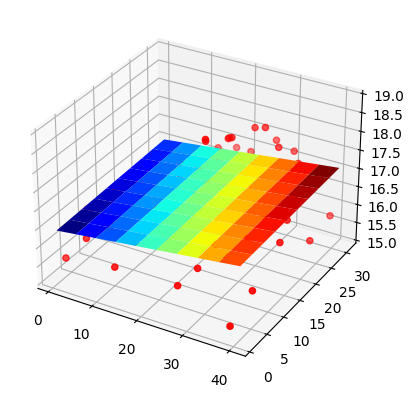

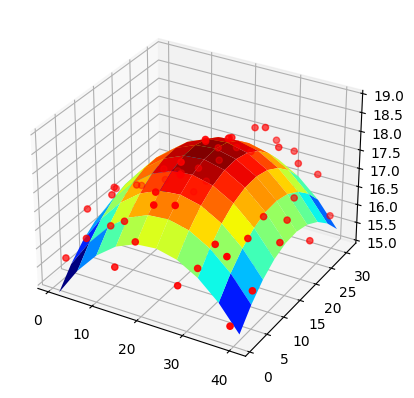

In [31]:
import numpy as np
import matplotlib.pyplot as plt

try:
    import probml_utils as pml
except ModuleNotFoundError:
    %pip install -qq git+https://github.com/probml/probml-utils.git
    import probml_utils as pml
from scipy.io import loadmat
import requests
from io import BytesIO

url = "https://raw.githubusercontent.com/probml/probml-data/main/data/moteData/moteData.mat"
response = requests.get(url)

# rawdata = response.text
rawdata = BytesIO(response.content)
data = loadmat(rawdata)

X = data["X"]
y = data["y"]

n = len(y)
X_pad = np.column_stack((np.ones(n), X))

for use_quad in (False, True):
    # adding non-square terms f(x) = w0 + w1x1 + w2x2
    phi = X_pad

    if use_quad:
        # adding square(x^2) terms f(x) = w0 + w1x1 + w2x2 + w3x1^2 + w4x2^2
        phi = np.column_stack((X_pad, X**2))

    # define the sub plot
    fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

    ax.set_zlim(15, 19)
    ax.scatter(X[:, 0], X[:, 1], y, color="r")

    n = 10
    xrange = np.linspace(min(X[:, 0]), max(X[:, 0]), n)
    yrange = np.linspace(min(X[:, 1]), max(X[:, 1]), n)
    xx, yy = np.meshgrid(xrange, yrange)
    flatxx = xx.reshape((n**2, 1))
    flatyy = yy.reshape((n**2, 1))
    # Here we define determine the function parameters
    w = np.linalg.lstsq(phi, y)[0]

    z = np.column_stack((flatxx, flatyy))
    z = np.column_stack((np.ones(n**2), z))
    if use_quad:
        z = np.column_stack((z, flatxx**2, flatyy**2))
    # f provides the values across all the cordinates defined in the plane
    f = np.dot(z, w)

    ax.plot_surface(xx, yy, f.reshape(n, n), rstride=1, cstride=1, cmap="jet")

    name = "linregSurfaceLinear.pdf"
    if use_quad:
        name = "linregSurfaceQuad.pdf"

    pml.savefig(name)
    plt.show()